<a href="https://colab.research.google.com/github/MustafaDabbagh1/ecommerce-ab-test/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail A/B Test – Notebook

**Objective:** Evaluate conversion lift from a new checkout. Run the next cell to load the sample data.

   variant  sessions  purchases    avg_aov
0  control        47         13  20.994255
1     test        53          5   7.447547

Absolute lift in conversion: -18.226%
z = 2.37, p = 0.0089
Saved dashboard.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

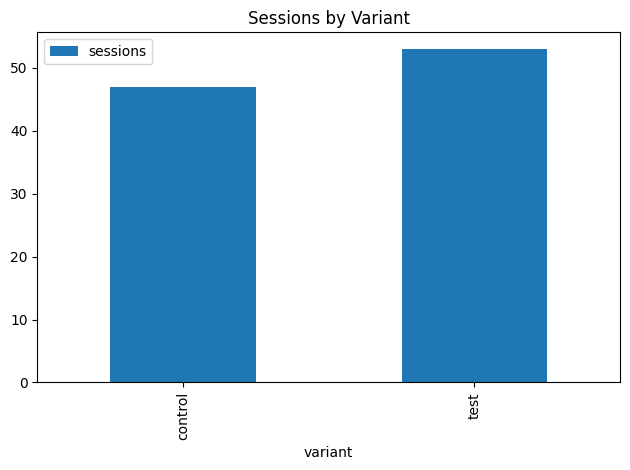

In [1]:
# Install deps
!pip -q install pandas numpy matplotlib scipy statsmodels

# Load data directly from your repo (root path)
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

RAW = "https://raw.githubusercontent.com/MustafaDabbagh1/ecommerce-ab-test/main/sample.csv"
df = pd.read_csv(RAW)

summary = (df.groupby('variant')
             .agg(sessions=('session_id','nunique'),
                  purchases=('purchased','sum'),
                  avg_aov=('aov','mean'))
             .reset_index())

count = summary['purchases'].values
nobs  = summary['sessions'].values
stat, pval = proportions_ztest(count, nobs, alternative='larger')

summary, (stat, pval)


# TL;DR you’ll paste into README
variants = summary["variant"].tolist()
conv = (summary["purchases"] / summary["sessions"]).values
lift_abs = conv[variants.index("test")] - conv[variants.index("control")]
print(summary)
print(f"\nAbsolute lift in conversion: {lift_abs:.3%}")
print(f"z = {stat:.2f}, p = {pval:.4f}")

# Save a simple chart to the repo root
import matplotlib.pyplot as plt
summary.plot(x="variant", y="sessions", kind="bar")
plt.title("Sessions by Variant"); plt.tight_layout()
plt.savefig("dashboard.png", dpi=160)
print("Saved dashboard.png")

from google.colab import files
files.download("dashboard.png")
